# Importing libraries 

In [1]:
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Tensorflow 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Model Inference 

In [3]:
model = load_model('audio_conv1d.h5')

In [4]:
def model_inference(audio_file):
    y, sr = librosa.load(audio_file)
    D = librosa.stft(y)
    spectrogram = librosa.amplitude_to_db(abs(D))
    spectrogram_resized = cv2.resize(spectrogram, (40, 1025))
    #img_array = np.expand_dims(spectrogram_resized, axis=0)
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    predictions = model.predict(np.expand_dims(spectrogram_resized, axis=0))
    predicted_class = np.argmax(predictions[0], axis=-1)
    label_encoder_mapping = {0: 'Laryngozele', 1: 'Normal', 2: 'Vox senilis'}
    plt.title(label_encoder_mapping[predicted_class])
    plt.show()

1/1 [==============================] - 0s 251ms/step


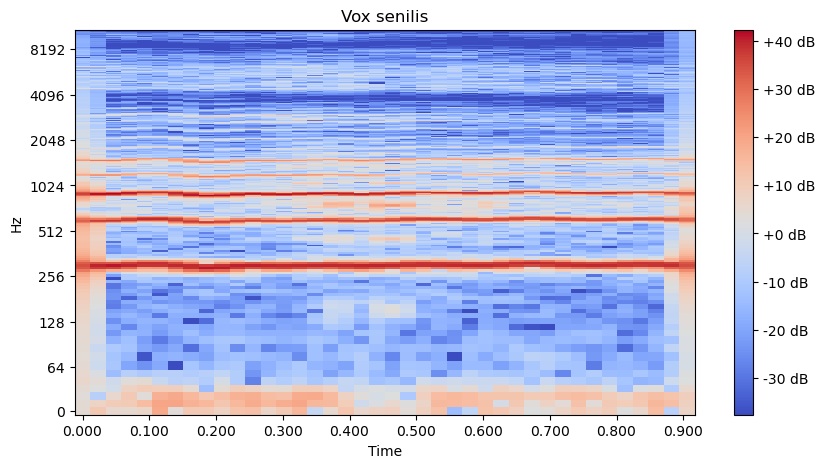

In [5]:
model_inference('Vox sentilis.wav')

1/1 [==============================] - 0s 28ms/step


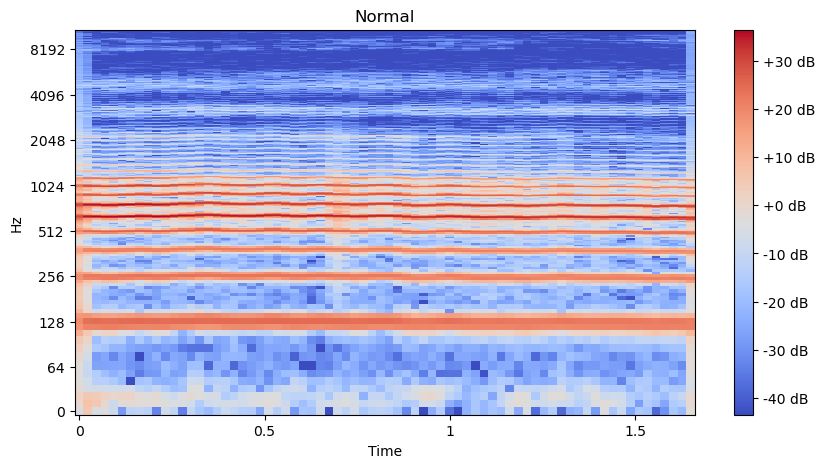

In [6]:
model_inference('Normal.wav')